# RNN_5_emotion

- 공포, 분노, 슬픔, 중립, 행복 5개의 감정 범주로 진행
- 전처리(Hanspell, PyKoSpacing)를 진행하지 않은 원본 데이터에서 추합해왔다. 
   - 각 범주별 데이터가 1000개 가량 늘어난 상태
<br><br>
- 참고
  - 'SimpleRNN_Test_Code_CPU.ipynb'  
  - https://wikidocs.net/22894 
  - https://katie0809.github.io/2020/02/17/ai-study4/ 





> ## 1. 전처리 패키지(Khaiii) Import

In [ ]:
!git clone https://github.com/kakao/khaiii.git

fatal: destination path 'khaiii' already exists and is not an empty directory.


In [ ]:
!pip install cmake

In [ ]:
!mkdir build

mkdir: cannot create directory ‘build’: File exists


In [ ]:
!cd build && cmake /content/khaiii

-- [khaiii] fused multiply add option enabled
-- [hunter] Calculating Toolchain-SHA1
-- [hunter] Calculating Config-SHA1
-- [hunter] HUNTER_ROOT: /root/.hunter
-- [hunter] [ Hunter-ID: 70287b1 | Toolchain-ID: 02ccb06 | Config-ID: dffbc08 ]
-- [hunter] BOOST_ROOT: /root/.hunter/_Base/70287b1/02ccb06/dffbc08/Install (ver.: 1.68.0-p1)
-- Boost version: 1.68.0
-- [hunter] CXXOPTS_ROOT: /root/.hunter/_Base/70287b1/02ccb06/dffbc08/Install (ver.: 2.1.1-pre)
-- [hunter] EIGEN_ROOT: /root/.hunter/_Base/70287b1/02ccb06/dffbc08/Install (ver.: 3.3.5)
-- [hunter] FMT_ROOT: /root/.hunter/_Base/70287b1/02ccb06/dffbc08/Install (ver.: 4.1.0)
-- [hunter] GTEST_ROOT: /root/.hunter/_Base/70287b1/02ccb06/dffbc08/Install (ver.: 1.8.0-hunter-p11)
-- [hunter] NLOHMANN_JSON_ROOT: /root/.hunter/_Base/70287b1/02ccb06/dffbc08/Install (ver.: 3.3.0)
-- [hunter] SPDLOG_ROOT: /root/.hunter/_Base/70287b1/02ccb06/dffbc08/Install (ver.: 0.16.3-p1)
-- Configuring done
-- Generating done
-- Build files have been written t

In [ ]:
!cd /content/build/ && make all

[ 65%] Built target obj_khaiii
[ 69%] Built target khaiii
[ 76%] Built target bin_khaiii
[100%] Built target test_khaiii


In [ ]:
!cd /content/build/ && make resource

Built target resource


In [ ]:
!cd /content/build && make install

[ 65%] Built target obj_khaiii
[ 69%] Built target khaiii
[ 76%] Built target bin_khaiii
[100%] Built target test_khaiii
Install the project...
-- Install configuration: ""
-- Up-to-date: /usr/local/include/khaiii
-- Up-to-date: /usr/local/include/khaiii/khaiii_dev.h
-- Up-to-date: /usr/local/include/khaiii/KhaiiiApi.hpp
-- Up-to-date: /usr/local/include/khaiii/khaiii_api.h
-- Up-to-date: /usr/local/share/khaiii
-- Up-to-date: /usr/local/share/khaiii/restore.key
-- Up-to-date: /usr/local/share/khaiii/hdn2tag.lin
-- Up-to-date: /usr/local/share/khaiii/preanal.tri
-- Up-to-date: /usr/local/share/khaiii/conv.5.fil
-- Up-to-date: /usr/local/share/khaiii/cnv2hdn.lin
-- Up-to-date: /usr/local/share/khaiii/config.json
-- Up-to-date: /usr/local/share/khaiii/restore.val
-- Up-to-date: /usr/local/share/khaiii/errpatch.tri
-- Up-to-date: /usr/local/share/khaiii/errpatch.val
-- Up-to-date: /usr/local/share/khaiii/restore.one
-- Up-to-date: /usr/local/share/khaiii/conv.2.fil
-- Up-to-date: /usr/loc

In [ ]:
!cd /content/build && make package_python

Run CPack packaging tool for source...
CPack: Create package using ZIP
CPack: Install projects
CPack: - Install directory: /content/khaiii
CPack: Create package
CPack: - package: /content/build/khaiii-0.4.zip generated.
Built target package_python


In [ ]:
!pip install /content/build/package_python

Processing ./build/package_python
  Created wheel for khaiii: filename=khaiii-0.4-cp37-none-any.whl size=22883097 sha256=124cd6d8b99095ac738a7ce7d720bd850397df8b5cea470638cefdb373de3ecc
  Stored in directory: /tmp/pip-ephem-wheel-cache-22eb3v85/wheels/6b/4d/23/84c4acc3ef5226ca75c4e3ad84c39a0654d11c3a9c1941193f
Successfully built khaiii
  Found existing installation: khaiii 0.4
    Uninstalling khaiii-0.4:
      Successfully uninstalled khaiii-0.4


In [ ]:
from khaiii import KhaiiiApi
api = KhaiiiApi()

> ## 2. 한글 폰트 설치

- 나눔폰트 설치

In [ ]:
!apt-get update -qq
!apt-get install fonts-nanum* -qq

- 설치 확인

In [ ]:
import matplotlib.font_manager as fm
sys_font = fm.findSystemFonts()

[f for f in sys_font if 'Nanum' in f]

['/usr/share/fonts/truetype/nanum/NanumSquareEB.ttf',
 '/usr/share/fonts/truetype/nanum/NanumMyeongjoExtraBold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothicEcoBold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareB.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareRoundB.ttf',
 '/usr/share/fonts/truetype/nanum/NanumBarunGothicUltraLight.ttf',
 '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf',
 '/usr/share/fonts/truetype/nanum/NanumBarunGothicBold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothicLight.ttf',
 '/usr/share/fonts/truetype/nanum/NanumMyeongjo.ttf',
 '/usr/share/fonts/truetype/nanum/NanumBarunpenB.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothicExtraBold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothicCoding-Bold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareR.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothic.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothicBold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareL.ttf',
 '/usr/share/fonts/truet

In [ ]:
import matplotlib.pyplot as plt

path = '/usr/share/fonts/truetype/nanum/NanumGothicExtraBold.ttf'
font_name = fm.FontProperties(fname=path, size=10).get_name()
print(font_name)
plt.rc('font', family=font_name)
fm._rebuild()

NanumGothic


- 적용하려면 '런타임 다시 시작' 진행

Text(0.5, 1.0, '안녕')

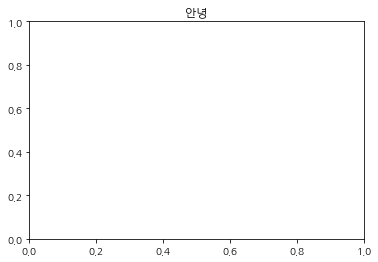

In [ ]:
plt.title('안녕')
# '안녕' 출력 확인

> ## 3. 데이터 불러오기



- dataset_final_Revise.xlsx

In [ ]:
import pandas as pd

df = pd.read_excel('dataset_emotion5.xlsx', engine='openpyxl') 

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35312 entries, 0 to 35311
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Sentence    35312 non-null  object 
 1   Emotion     35312 non-null  object 
 2   Unnamed: 2  0 non-null      float64
 3   Unnamed: 3  0 non-null      float64
 4   Unnamed: 4  5 non-null      object 
 5   Unnamed: 5  6 non-null      float64
dtypes: float64(3), object(3)
memory usage: 1.6+ MB


In [ ]:
df = df.loc[:,['Sentence', 'Emotion']]
df.head()

,Sentence,Emotion
0,언니 동생으로 부르는게 맞는 일인가요..??,공포
1,그냥 내 느낌일뿐겠지?,공포
2,아직너무초기라서 그런거죠?,공포
3,유치원버스 사고 낫다던데,공포
4,근데 원래이런거맞나요,공포


In [ ]:
df['Emotion'] = df['Emotion'].replace(['공포','분노','슬픔','중립','행복'],[0,1,2,3,4])

In [ ]:
df.head()

,Sentence,Emotion
0,언니 동생으로 부르는게 맞는 일인가요..??,0
1,그냥 내 느낌일뿐겠지?,0
2,아직너무초기라서 그런거죠?,0
3,유치원버스 사고 낫다던데,0
4,근데 원래이런거맞나요,0


In [ ]:
df.tail()

,Sentence,Emotion
35307,왔다갔다 하는게 오히려 스트레스받는가 싶어서.,3
35308,밥을 안 먹으면 누나가 신경 써주니까 괜히 그러는 거야. 내버려두면 조만간 밥을 먹...,3
35309,음. 그럴까?,3
35310,일주일이나 굶었으면 배고플 텐데 고집이 세네.,3
35311,"글쎄, 말을 안 해줘서 모르겠어.",3


In [ ]:
print('총 샘플 수 : ', len(df))

총 샘플 수 :  35312


In [ ]:
# 중복 없는 문장 확인
df.nunique()

Sentence    34858
Emotion         5
dtype: int64

In [ ]:
# 중복 문장 제거 -> 369문장 삭제 됨
df.drop_duplicates(subset = ['Sentence'], inplace = True)
len(df)

34858

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34858 entries, 0 to 35311
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Sentence  34858 non-null  object
 1   Emotion   34858 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 817.0+ KB


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

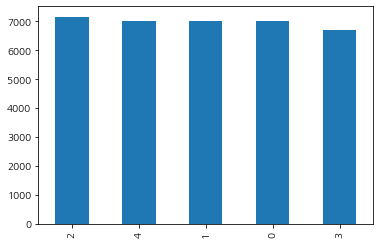

In [ ]:
df['Emotion'].value_counts().plot(kind = 'bar');

> ## 4. Train, Valid, Test Split(6 : 2 : 2)

In [ ]:
from sklearn.model_selection import train_test_split
train_data, test_data = train_test_split(df, 
                                         test_size = 0.2,
                                         shuffle = False,
                                         random_state = 2045)

print(len(train_data))
print(len(test_data))

27886
6972


In [ ]:
train_data, valid_data = train_test_split(train_data, 
                                          test_size = 0.2,
                                          shuffle = False,
                                          random_state = 2045)

print(len(train_data))
print(len(valid_data))

22308
5578


In [ ]:
X_train = train_data['Sentence']
X_valid = valid_data['Sentence']
X_test = test_data['Sentence']
y_train = train_data['Emotion']
y_valid = valid_data['Emotion']
y_test = test_data['Emotion']

In [ ]:
print(X_train)
print(X_valid)
print(X_test)
print(y_train)
print(y_valid)
print(y_test)

0                                 언니 동생으로 부르는게 맞는 일인가요..??
1                                             그냥 내 느낌일뿐겠지?
2                                           아직너무초기라서 그런거죠?
3                                            유치원버스 사고 낫다던데
4                                              근데 원래이런거맞나요
                               ...                        
22336                    통신비가 준게 아니라 싼폰을 살수 밖에 없이 만들어서 그렇지
22337                                    독일3사에 비빌려는 아반떼같은거
22338                           모피가 아니더라도 당신은 충분히 아름답습니다..
22339                         조의연 판사한테는 믿고 싶지 않은 뉴스겠군요....
22340    졸업후 대기업에 입사하려면 <부모님이나 하다못해 사돈에 팔촌이라도 금수저인지>가 가...
Name: Sentence, Length: 22308, dtype: object
22341              민주주의.언론의자유.시위의선은어디까지인지.경계를 넘어버린단체행동
22342                       광우뻥걸린 좀비들 아직도 안죽고 살아있음 ㅋㅋㅋ
22343                             라는 야당의 일갈에 버로우 탔습니다.
22344            배출가스 조작했는거 알면서도 싸게판다고 산 사람들은 벌 좀 받아야지
22345                       나 22살때부터 갤투 갤쓰리 갤노트4 쓰고있는데
                             ..

In [ ]:
print(type(X_train))

<class 'pandas.core.series.Series'>


> ## 5. 카이 토큰화(형태소 분석) & 정수 인코딩 수행

> ### 1) 카이 토큰화

In [ ]:
def khaiii_tokenized(s):
  result = []                         # def 밑에 있어야 문장별로 리스트가 따로 들어간다 
  for word in api.analyze(s):
    for morph in word.morphs:
      result.append(morph.lex)
  return result

In [ ]:
X_train_tokenized = X_train.apply(khaiii_tokenized)
X_valid_tokenized = X_valid.apply(khaiii_tokenized)
X_test_tokenized = X_test.apply(khaiii_tokenized)

In [ ]:
X_train_tokenized

0        [언니, 동생, 으로, 부르, 는, 것, 이, 맞, 는, 일, 이, ㄴ가요, ..,...
1                      [그냥, 나, 의, 느낌, 이, ㄹ, 뿐, 이, 겠, 지, ?]
2                           [아직너, 무초기, 이, 라서, 그런, 거, 죠, ?]
3                                    [유치원버스, 사, 고, 낫, 다던데]
4                                   [근데, 원래, 이, 런거, 맞나, 요]
                               ...                        
22336    [통신비, 가, 주, ㄴ, 게, 아니, 라, 싼폰, 을, 살수, 밖, 에, 없이, ...
22337                [독일, 3, 사, 에, 비빌, 려는, 아반, 떼, 같, 은, 거]
22338           [모피, 가, 아니, 더라도, 당신, 은, 충분히, 아름답, 습니다, ..]
22339    [조의연, 판사, 한테, 는, 믿, 고, 싶, 지, 않, 은, 뉴, 스, 이, 겠,...
22340    [졸업, 후, 대, 기업, 에, 입사, 하, 려면, <, 부모, 님, 이나, 하, ...
Name: Sentence, Length: 22308, dtype: object

In [ ]:
print(type(X_train_tokenized))

<class 'pandas.core.series.Series'>


- Series to List

In [ ]:
X_train_tokenized = X_train_tokenized.tolist()
X_valid_tokenized = X_valid_tokenized.tolist()
X_test_tokenized = X_test_tokenized.tolist()

In [ ]:
print(type(X_train_tokenized))

<class 'list'>


In [ ]:
X_train_tokenized

[['언니',
  '동생',
  '으로',
  '부르',
  '는',
  '것',
  '이',
  '맞',
  '는',
  '일',
  '이',
  'ㄴ가요',
  '..',
  '?',
  '?'],
 ['그냥', '나', '의', '느낌', '이', 'ㄹ', '뿐', '이', '겠', '지', '?'],
 ['아직너', '무초기', '이', '라서', '그런', '거', '죠', '?'],
 ['유치원버스', '사', '고', '낫', '다던데'],
 ['근데', '원래', '이', '런거', '맞나', '요'],
 ['남자', '친구', '가', '떠나', 'ㄹ까', '보', '아요'],
 ['이거', '하', '였', '는데', '허리', '가', '아플수', '도', '있', '나요', '?', ';;'],
 ['내', '가', '불안', '하', '여서', '꾸', '는', '것', '이', 'ㄹ까', '..'],
 ['일주일', '도', '안', '남', '았', '당', '.', '..', 'ㅠ', 'ㅠ'],
 ['약',
  '은',
  '최대한',
  '안',
  '먹',
  '으려고',
  '하',
  '는데',
  '좋',
  '은',
  '음시',
  '있',
  '나요',
  '?',
  '0'],
 ['구직',
  '활동',
  '하',
  '면서',
  '남',
  '는',
  '시간',
  '은',
  '무엇',
  '으로',
  '활용',
  '하',
  '여야',
  '되',
  '지',
  '..'],
 ['괜찮', '은', '분', '같', '아서', '괜히', '조급', '하', '여', '지', '네', '요', 'ㅜ'],
 ['제',
  '가',
  '스타일',
  '을',
  '바꾸',
  '면',
  '더',
  '어색',
  '하',
  '게',
  '만',
  '변하',
  'ㄹ',
  '것',
  '같',
  '아서',
  'ㅠ',
  '0'],
 ['아내',
  '있',
  '으면',
  '여자',
  '있'

> ### 2) 정수인코딩

In [ ]:
from keras.preprocessing.text import Tokenizer
from keras.utils import to_categorical
from keras.preprocessing.text import Tokenizer

In [ ]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train_tokenized) 
X_train = tokenizer.texts_to_sequences(X_train_tokenized) # 단어를 숫자값, 인덱스로 변환하여 저장
X_valid = tokenizer.texts_to_sequences(X_valid_tokenized)
X_test = tokenizer.texts_to_sequences(X_test_tokenized)

In [ ]:
print(X_train[:5])
print(X_valid[:5])
print(X_test[:5])

[[1119, 1120, 47, 681, 4, 19, 2, 168, 4, 70, 2, 182, 26, 8, 8], [127, 18, 36, 532, 2, 17, 347, 2, 37, 14, 8], [8700, 8701, 2, 418, 312, 33, 116, 8], [8702, 169, 6, 399, 2586], [144, 496, 2, 8703, 1420, 58]]
[[1242, 3, 515, 36, 1977, 3, 856, 36, 825, 12, 218, 111, 2, 148, 3, 22395, 34, 235, 15, 178, 5, 872, 809], [157, 5, 4036, 13, 177, 10, 35, 147, 6, 99, 21, 24, 130, 108, 77], [2, 241, 1462, 36, 11, 246, 338, 44, 141, 3], [7462, 5056, 715, 1, 52, 4, 33, 81, 174, 10, 531, 22, 346, 204, 99, 5, 67, 13, 12, 526, 92, 80, 626], [18, 1659, 99, 96, 149, 2374, 298, 101, 6, 24, 32]]
[[41, 12, 33, 1899, 1, 40, 50, 49, 28, 3541, 1, 37, 141, 3], [487, 22, 202, 17, 73, 24, 22, 1915, 15, 50, 49, 57, 3541, 1, 62, 417, 976], [4095, 356, 109, 3746, 121, 44, 54, 93], [162, 34, 615, 3079, 22, 1, 40, 50, 4, 390, 918, 8827, 356, 13, 3, 26], [839, 11, 121, 12, 1903, 2, 20, 62]]


In [ ]:
print(len(X_train))
print(len(X_valid))
print(len(X_test))

22308
5578
6972


- 어떤 단어에 어떤 정수가 부여 되었는지 확인
   - 빈도가 높을 수록 낮은 정수 부여
      - 1 ~ 16865번까지 존재

In [ ]:
word_to_index = tokenizer.word_index
len(word_to_index)

23364

In [ ]:
print(word_to_index)

{'하': 1, '이': 2, '.': 3, '는': 4, 'ㄴ': 5, '고': 6, '가': 7, '?': 8, '다': 9, '도': 10, '에': 11, '은': 12, '들': 13, '지': 14, '어': 15, '을': 16, 'ㄹ': 17, '나': 18, '것': 19, '되': 20, '아': 21, '게': 22, '!': 23, '있': 24, 'ㅠ': 25, '..': 26, '보': 27, '면': 28, '었': 29, '네': 30, '...': 31, '는데': 32, '거': 33, '를': 34, '안': 35, '의': 36, '겠': 37, '없': 38, '만': 39, '여': 40, '같': 41, '아니': 42, '기': 43, '았': 44, '로': 45, '라': 46, '으로': 47, '말': 48, '시': 49, '주': 50, '저': 51, '였': 52, '냐': 53, '어요': 54, '에서': 55, 'ㄴ다': 56, '어서': 57, '요': 58, '네요': 59, '니': 60, '오': 61, 'ㅂ니다': 62, 'ㄴ데': 63, '너무': 64, '그': 65, '뭐': 66, '사람': 67, ',': 68, '못': 69, '일': 70, '않': 71, '아서': 72, '수': 73, '야': 74, '여야': 75, '싶': 76, 'ㅋ': 77, '여서': 78, '더': 79, '받': 80, '알': 81, '좋': 82, '진짜': 83, '어떻': 84, '한': 85, '왜': 86, '제': 87, '잘': 88, '먹': 89, '어야': 90, '??': 91, '좀': 92, '~': 93, '내': 94, '모르': 95, '때': 96, '....': 97, '적': 98, '살': 99, 'ㅁ': 100, '쓰': 101, '년': 102, '생각': 103, '으면': 104, 'ㄴ가': 105, '자': 106, '라고': 107, 'ㅋㅋ': 

In [ ]:
threshold = 2
total_cnt = len(word_to_index) # 단어의 수
rare_cnt = 0 # 등장 빈도수가 threshold보다 작은 단어의 개수를 카운트
total_freq = 0 # 훈련 데이터의 전체 단어 빈도수 총 합
rare_freq = 0 # 등장 빈도수가 threshold보다 작은 단어의 등장 빈도수의 총 합

# 단어와 빈도수의 쌍(pair)을 key와 value로 받는다.
for key, value in tokenizer.word_counts.items():
    total_freq = total_freq + value

    # 단어의 등장 빈도수가 threshold보다 작으면
    if(value < threshold):
        rare_cnt = rare_cnt + 1
        rare_freq = rare_freq + value

print('전체 단어 수: ', total_cnt + 1) # 패딩을 위한 토큰인 0번 단어 고려 +1
print('등장 빈도가 %s번 이하인 희귀 단어의 수: %s'%(threshold - 1, rare_cnt)) # 빈도수 1인 단어 수
print("단어 집합(vocabulary)에서 희귀 단어의 비율:", (rare_cnt / total_cnt)*100) # 전체 단어 중 빈도수 1회 단어가 72.6%나 된다.
print("전체 등장 빈도에서 희귀 단어 등장 빈도 비율:", (rare_freq / total_freq)*100) 

전체 단어 수:  23365
등장 빈도가 1번 이하인 희귀 단어의 수: 14665
단어 집합(vocabulary)에서 희귀 단어의 비율: 62.76750556411573
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 4.828412731337436


In [ ]:
vocab_size = len(word_to_index) + 1
print('단어 집합의 크기: {}'.format((vocab_size)))

단어 집합의 크기: 23365


> ## 6. Padding & One-Hot Encoding

- Padding을 하기 위해 댓글 길이 분포를 살펴보자

댓글 최대 길이 : 102
댓글 평균 길이 : 13.614981


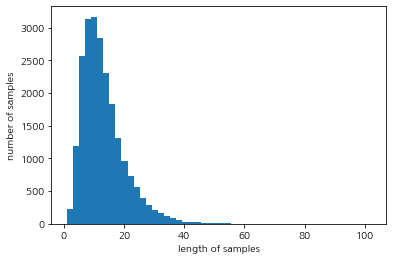

In [ ]:
print('댓글 최대 길이 : %d' %max(len(i) for i in X_train))
print('댓글 평균 길이 : %f' % (sum(map(len, X_train)) / len(X_train)))
plt.hist([len(s) for s in X_train], bins = 50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

- 45에 맞추어 Padding 진행

In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
max_len = 45
X_train = pad_sequences(X_train, maxlen = max_len)
X_valid = pad_sequences(X_valid, maxlen = max_len)
X_test = pad_sequences(X_test, maxlen = max_len)

print('Train 데이터 크기(shape) : ', X_train.shape)
print('Valid 데이터 크기(shape) : ', X_valid.shape)
print('Test 데이터 크기(shape) : ', X_test.shape)

Train 데이터 크기(shape) :  (22308, 45)
Valid 데이터 크기(shape) :  (5578, 45)
Test 데이터 크기(shape) :  (6972, 45)


- y_data One_Hot_Encoding

In [ ]:
from keras.utils import to_categorical
y_train = to_categorical(y_train,5)
y_valid = to_categorical(y_valid,5)
y_test = to_categorical(y_test,5)

In [ ]:
X_train.shape, y_train.shape, X_valid.shape, y_valid.shape, X_test.shape, y_test.shape

((22308, 45), (22308, 5), (5578, 45), (5578, 5), (6972, 45), (6972, 5))

> ## 7. 단어 임베딩 : Word2Vec 

In [ ]:
train_tokenized = X_train_tokenized + X_valid_tokenized

In [ ]:
from gensim.models import Word2Vec

model = Word2Vec(sentences = train_tokenized,
                 size = 45,
                 window = 3,
                 min_count = 1,
                 workers = 4,
                 sg = 1)  # sg=1 -> Skip-gram. CBOW보다 성능이 좋다. 

In [ ]:
model.wv.vocab

{'언니': <gensim.models.keyedvectors.Vocab at 0x7f7de7ed8510>,
 '동생': <gensim.models.keyedvectors.Vocab at 0x7f7db213c090>,
 '으로': <gensim.models.keyedvectors.Vocab at 0x7f7db24be410>,
 '부르': <gensim.models.keyedvectors.Vocab at 0x7f7db24be490>,
 '는': <gensim.models.keyedvectors.Vocab at 0x7f7db24e0e50>,
 '것': <gensim.models.keyedvectors.Vocab at 0x7f7db24e0d10>,
 '이': <gensim.models.keyedvectors.Vocab at 0x7f7db24e0f90>,
 '맞': <gensim.models.keyedvectors.Vocab at 0x7f7db24e0ed0>,
 '일': <gensim.models.keyedvectors.Vocab at 0x7f7db24e0d50>,
 'ㄴ가요': <gensim.models.keyedvectors.Vocab at 0x7f7db24e0e90>,
 '..': <gensim.models.keyedvectors.Vocab at 0x7f7db24e0f10>,
 '?': <gensim.models.keyedvectors.Vocab at 0x7f7db24e0e10>,
 '그냥': <gensim.models.keyedvectors.Vocab at 0x7f7db24e0fd0>,
 '나': <gensim.models.keyedvectors.Vocab at 0x7f7db24e0b90>,
 '의': <gensim.models.keyedvectors.Vocab at 0x7f7db24e0bd0>,
 '느낌': <gensim.models.keyedvectors.Vocab at 0x7f7db24e0c10>,
 'ㄹ': <gensim.models.keyedvecto

In [ ]:
model.wv.vectors.shape

(27316, 45)

In [ ]:
print(model.wv.most_similar('♡'))

[('^^', 0.9781111478805542), ('^', 0.9614317417144775), ('ㅠㅠㅠㅠ', 0.9550170302391052), ('안녕', 0.9518915414810181), ('화이팅', 0.9514301419258118), ('ㅠㅠㅠㅠㅠ', 0.9504590630531311), ('_', 0.9499918818473816), ('ㅅ', 0.9450311064720154), ('ㅠㅠㅠ', 0.9437839388847351), ('ㅂ니', 0.942510187625885)]


In [ ]:
print(model.wv.most_similar('축하'))

[('죄송', 0.96073317527771), ('화이팅', 0.9414370059967041), ('응원', 0.940568208694458), ('감사', 0.936424732208252), ('ㅂ니', 0.9340241551399231), ('존경', 0.9280248284339905), ('막막', 0.9255588054656982), ('^^', 0.9242748022079468), ('방탈죄송', 0.9234144687652588), ('부탁', 0.9218323826789856)]


In [ ]:
print(model.wv.most_similar('선수'))

[('팀', 0.9596123099327087), ('너희', 0.9586896300315857), ('연예인', 0.9556668400764465), ('오빠', 0.9548136591911316), ('아이', 0.953884482383728), ('미래', 0.9517337679862976), ('학생', 0.9516851305961609), ('가족', 0.9513254761695862), ('남편', 0.9504202008247375), ('우리', 0.9493939876556396)]


In [ ]:
embedding_dim = 45

embedding_matrix = np.zeros((27316, embedding_dim))

for word, i in word_to_index.items():
  try:
    embedding_vector = model.wv.get_vector(word)
    embedding_matrix[i] = embedding_vector
    
  except KeyError:
    continue

> ## 8. RNN Modeling

> ### 1) Define

In [ ]:
from tensorflow.keras.layers import SimpleRNN, Embedding, Dense
from tensorflow.keras.models import Sequential
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
from keras import regularizers
from keras import models
from keras import layers
from keras import backend as K
import tensorflow as tf

In [ ]:
# 필요할 때 쓰기
K.clear_session() 

Case_5_emotion : 'RNN_HyperParameter.ipynb' 모델 중 좋았던 조합(Case_10) -> Batch_Normalization(Kernel_Regularizer) + Adam(Optimization_method)


In [ ]:
model = Sequential(name = 'RNN_Case_5_emotion_original')
model.add(Embedding(27316, 45)) 
model.add(SimpleRNN(64))
model.add(layers.BatchNormalization())
model.add(Dense(5, activation = 'softmax'))

In [ ]:
model.layers[0].set_weights([embedding_matrix])
model.layers[0].trainable = True

In [ ]:
model.summary()

Model: "RNN_Case_5_emotion_original"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 45)          1229220   
_________________________________________________________________
simple_rnn (SimpleRNN)       (None, 64)                7040      
_________________________________________________________________
batch_normalization (BatchNo (None, 64)                256       
_________________________________________________________________
dense (Dense)                (None, 5)                 325       
Total params: 1,236,841
Trainable params: 1,236,713
Non-trainable params: 128
_________________________________________________________________


> ### 2) Compile 

In [ ]:
model.compile(loss = 'categorical_crossentropy', 
                optimizer = 'adam', 
                metrics = ['accuracy'])

> ### 3) EarlyStopping() & ModelCheckpoint()





In [ ]:
es = EarlyStopping(monitor = 'val_accuracy' ,
                   mode = 'max',
                   patience = 10,
                   verbose = 1)

mc = ModelCheckpoint('RNN_model_5_emotion_original.h5' ,
                     monitor = 'val_accuracy' ,
                     mode = 'max' ,
                     save_best_only = True ,
                     verbose = 1)

> ### 4) Fit

- Case_5_emotion_original : Batch + Adam
  - 약 2분

In [ ]:
%%time
history_5_emotion_ori = model.fit(X_train, y_train, 
                             epochs = 60, 
                             batch_size = 100, 
                             validation_data = (X_valid, y_valid),
                             callbacks = [es, mc],
                             verbose = 1)

Epoch 1/60
224/224 [==============================] - 10s 36ms/step - loss: 1.5069 - accuracy: 0.3922 - val_loss: 2.8848 - val_accuracy: 0.0041

Epoch 00001: val_accuracy improved from -inf to 0.00412, saving model to RNN_model_5_emotion_original.h5
Epoch 2/60
224/224 [==============================] - 8s 34ms/step - loss: 1.0436 - accuracy: 0.5568 - val_loss: 4.1330 - val_accuracy: 0.0319

Epoch 00002: val_accuracy improved from 0.00412 to 0.03191, saving model to RNN_model_5_emotion_original.h5
Epoch 3/60
224/224 [==============================] - 8s 35ms/step - loss: 0.8962 - accuracy: 0.6238 - val_loss: 4.4659 - val_accuracy: 0.0463

Epoch 00003: val_accuracy improved from 0.03191 to 0.04625, saving model to RNN_model_5_emotion_original.h5
Epoch 4/60
224/224 [==============================] - 8s 34ms/step - loss: 0.7354 - accuracy: 0.7033 - val_loss: 5.2046 - val_accuracy: 0.0500

Epoch 00004: val_accuracy improved from 0.04625 to 0.05002, saving model to RNN_model_5_emotion_origin

> ### 5) Visualization

- Accuaracy & Loss



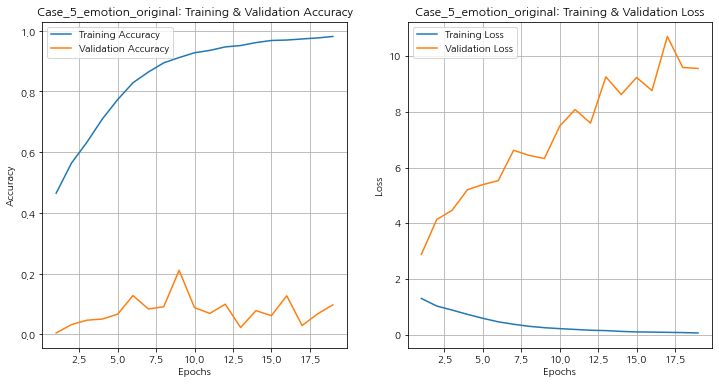

In [ ]:
epochs1 = range(1, len(history_5_emotion_ori.history['val_accuracy']) + 1)
epochs2 = range(1, len(history_5_emotion_ori.history['val_loss']) + 1)

plt.figure(figsize = (12, 6))

plt.subplot(1, 2, 1)
plt.plot(epochs1, history_5_emotion_ori.history['accuracy'])
plt.plot(epochs1, history_5_emotion_ori.history['val_accuracy'])
plt.title('Case_5_emotion_original: Training & Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Training Accuracy' , 'Validation Accuracy'])
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(epochs2, history_5_emotion_ori.history['loss'])
plt.plot(epochs2, history_5_emotion_ori.history['val_loss'])
plt.title('Case_5_emotion_original: Training & Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Training Loss' , 'Validation Loss'])
plt.grid()

plt.show()

> ### 6) Predict

In [ ]:
loss, accuracy = model.evaluate(X_test, y_test)

print('Loss = {:.5f}'.format(loss))
print('Accuracy = {:.5f}'.format(accuracy))
# 0.16. 또 낮아졌다

218/218 [==============================] - 1s 5ms/step - loss: 7.8287 - accuracy: 0.1675
Loss = 7.82870
Accuracy = 0.16753


> ## 9. Test



In [ ]:
def sentiment_predict(sentence):
  sentence = sentence.replace('[^ㄱ-ㅎㅏ-ㅣ가-힣A-Za-z♡!?.^;*% ]', '')
  sentence = khaiii_tokenized(sentence)
  encoded = tokenizer.texts_to_sequences([sentence])
  pad_sentence = pad_sequences(encoded, maxlen=max_len)
  result = model.predict(pad_sentence)
  print(f'공포: {result[0][0]:.5f}')
  print(f'분노: {result[0][1]:.5f}')
  print(f'슬픔: {result[0][2]:.5f}')
  print(f'중립: {result[0][3]:.5f}')
  print(f'행복: {result[0][4]:.5f}')

In [ ]:
# 공포1 
sentence = '아니.. 진짜 너무 무서운데ㅜㅜ'
sentiment_predict(sentence)

공포: 0.99315
분노: 0.00021
슬픔: 0.00663
중립: 0.00000
행복: 0.00000


In [ ]:
# 공포2 :  
sentence = '나 내일 시험 떨어지면 어떡하지?'
sentiment_predict(sentence)

공포: 0.99847
분노: 0.00001
슬픔: 0.00034
중립: 0.00118
행복: 0.00000


In [ ]:
# 분노 
sentence = '진짜..쓰레기 기업이네'
sentiment_predict(sentence)

공포: 0.00000
분노: 1.00000
슬픔: 0.00000
중립: 0.00000
행복: 0.00000


In [ ]:
# 슬픔 : '슬픈, 슬프게 느껴지는'은 슬픔인데, '슬프게 다가오는'은 공포임
sentence = '유독 슬프게 다가오는 두 배우의 눈빛과 아름다운 영상미'
sentiment_predict(sentence)

공포: 0.97875
분노: 0.00000
슬픔: 0.02121
중립: 0.00004
행복: 0.00000


In [ ]:
# 중립1 : 처음으로 잘 분류해냈다.
sentence = '그들의 삶을 있는 그대로 보여준 영화'
sentiment_predict(sentence)

공포: 0.01698
분노: 0.10092
슬픔: 0.00921
중립: 0.87280
행복: 0.00009


In [ ]:
# 중립2 : 헷갈리는 부분이 있는 듯
sentence = '내 핸드폰은 갤럭시 기종이다.'
sentiment_predict(sentence)

공포: 0.00135
분노: 0.48296
슬픔: 0.00002
중립: 0.51563
행복: 0.00004


In [ ]:
# 행복 : 잘 분류하지 못한다.
sentence = '나 기분이 너무 좋아!^^'
sentiment_predict(sentence)

공포: 0.00002
분노: 0.00005
슬픔: 0.98761
중립: 0.01221
행복: 0.00012


In [ ]:
# 행복 : 잘 분류하지 못한다.
sentence = '나돜ㅋㅋㅋㅋㅋㅋㅋ 유야호 하는 부분 보려고 계속 재생중임ㅋㅋㅋㅋㅋ^^'
sentiment_predict(sentence)

공포: 0.00001
분노: 0.81017
슬픔: 0.00001
중립: 0.18949
행복: 0.00033


> ## 결론 

- 공포(0), 분노(1), 슬픔(2), 중립(3), 행복(4) 감정의 범주를 5개로 줄여서 진행했다.
   - 행복을 가장 잘 분류하지 못했다. 나머지 감정은 잘 분류해냈다. 

- X data 정규화도 함께 진행, 감정 3범주로 줄여서 진행을 해보겠다. 

> ## 10. 모델 저장

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!ls -l '/content/drive/My Drive/Colab Notebooks/models'

total 764567
-rw------- 1 root root   4353288 Mar 19 08:32 001_best_mnist.h5
-rw------- 1 root root     34592 Mar 17 07:32 001_model_iris.h5
drwx------ 2 root root      4096 Mar 19 08:32 002_best_mnist.h6
-rw------- 1 root root  41498896 Mar 23 02:27 002_dogs_and_cats_small.h5
drwx------ 2 root root      4096 Mar 19 08:33 003_best_mnist.h7
-rw------- 1 root root  41499744 Mar 23 06:23 003_dogs_and_cats_small.h5
-rw------- 1 root root  39879700 Mar 23 04:48 003_Logo_Data.h5
-rw------- 1 root root  25199032 Mar 24 05:15 004_dogs_and_cats_feature_extraction.h5
-rw------- 1 root root 140748400 Mar 24 07:28 005_dogs_and_cats_fine_tuning.h5
-rw------- 1 root root  19508640 Apr 15 02:05 best_vanilla.h5
-rw------- 1 root root   1373346 Apr  8 09:25 one_off_conversation_2_bin_result.xlsx
-rw------- 1 root root  58519584 Apr 15 09:13 RNN_model_10.h5
-rw------- 1 root root  58511664 Apr 15 09:15 RNN_model_11.h5
-rw------- 1 root root  39017784 Apr 15 09:05 RNN_model_1.h5
-rw------- 1 root root  3

In [ ]:
model.save('/content/drive/My Drive/Colab Notebooks/models/RNN_model_5_emotion_original.h5')

In [ ]:
!ls -l '/content/drive/My Drive/Colab Notebooks/models'

total 819069
-rw------- 1 root root   4353288 Mar 19 08:32 001_best_mnist.h5
-rw------- 1 root root     34592 Mar 17 07:32 001_model_iris.h5
drwx------ 2 root root      4096 Mar 19 08:32 002_best_mnist.h6
-rw------- 1 root root  41498896 Mar 23 02:27 002_dogs_and_cats_small.h5
drwx------ 2 root root      4096 Mar 19 08:33 003_best_mnist.h7
-rw------- 1 root root  41499744 Mar 23 06:23 003_dogs_and_cats_small.h5
-rw------- 1 root root  39879700 Mar 23 04:48 003_Logo_Data.h5
-rw------- 1 root root  25199032 Mar 24 05:15 004_dogs_and_cats_feature_extraction.h5
-rw------- 1 root root 140748400 Mar 24 07:28 005_dogs_and_cats_fine_tuning.h5
-rw------- 1 root root  19508640 Apr 15 02:05 best_vanilla.h5
-rw------- 1 root root   1373346 Apr  8 09:25 one_off_conversation_2_bin_result.xlsx
-rw------- 1 root root  58519584 Apr 15 09:13 RNN_model_10.h5
-rw------- 1 root root  58511664 Apr 15 09:15 RNN_model_11.h5
-rw------- 1 root root  39017784 Apr 15 09:05 RNN_model_1.h5
-rw------- 1 root root  3